In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
# File with effective mass output.
base = 'test_pion_mass_output/'
file = base + 'cl3_16_48_b6p1_m0p2450_output1.txt'

In [3]:
f = open(file, 'r')

In [4]:
# New read in format: Each line after the first of form cfgId|a1+ib a2+ib ...
f.readline()
L3 = 48    #temporal extent of lattice
C = []
for line in f:
    cur_line = np.zeros(L3, dtype=complex)
    cfgIdx, rest = line.split('|')
    cfgIdx = int(cfgIdx)
    interps = rest.split(' ')    # now get real and complex
    for n_t, x in enumerate(interps):
        if not x.isspace():
            real, imag = x.split('+i(')    #form should be x = a+i(b)
            real = float(real)
            imag = float(imag.replace(')', ''))
            cur_line[n_t] = complex(real, imag)
    #print(cur_line)
    cur_line = [cur_line]
    if C == []:
        C = np.array(cur_line)
    else:
        C = np.append(C, cur_line, axis = 0)
# ideally C should be a #configs x L3 array, so C[i, j] indexes configuration i with time extent j

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [5]:
def bootstrap(C, n_boot = 500):
    num_configs = C.shape[0]
    n_t = C.shape[1]
    samples = np.zeros((n_boot, n_t), dtype=complex)
    for i in range(n_boot):
        cfgIds = np.random.choice(num_configs, num_configs)    #Configuration ids to pick
        samples[i, :] = np.mean(C[cfgIds, :], axis = 0)
    return samples

In [6]:
samples = bootstrap(C)
Cavg = np.mean(np.abs(samples), axis = 0)
σ = np.std(np.abs(samples), axis = 0)

In [7]:
# Cavg = np.mean(np.abs(C), axis = 0)    #each of these should be a L3 size list
# σ = np.std(np.abs(C), axis = 0)

In [8]:
m = []
σ_m = []
for i in range(L3 - 1):
    m.append(np.log(Cavg[i] / Cavg[i + 1]))
    σ_m.append(np.sqrt((σ[i] / Cavg[i])**2 + (σ[i + 1] / Cavg[i + 1])**2))

In [9]:
samples.shape

(500, 48)

Text(0, 0.5, '$log(C(n_t))$')

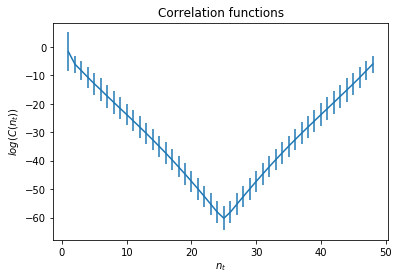

In [10]:
σ_logC = σ / Cavg    #σ_{log(C)} = σ_C / C
plt.figure()
# plt.scatter(n_t, np.log(np.abs(C)))
plt.errorbar(range(1, n_t + 1), np.log(np.abs(Cavg)), yerr = np.log(σ_logC))
plt.title('Correlation functions')
plt.xlabel('$n_t$')
plt.ylabel('$log(C(n_t))$')

Text(0, 0.5, '$m_{eff}$')

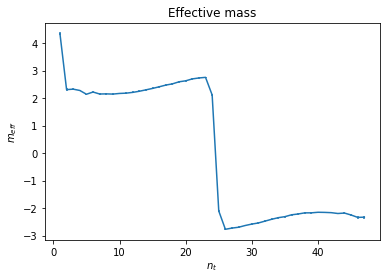

In [11]:
plt.figure()
plt.errorbar(range(1, n_t), m, yerr = σ_m)
plt.title('Effective mass')
plt.xlabel('$n_t$')
plt.ylabel('$m_{eff}$')

In [12]:
σ_m

[0.04870795200223694,
 0.05896882922233574,
 0.04106248059458114,
 0.031206274656227172,
 0.026429621156781886,
 0.024496649528071103,
 0.025055203870901148,
 0.02757360113900835,
 0.030566139095612045,
 0.03214771076012539,
 0.03284622177443231,
 0.0337980404133216,
 0.03408257135006614,
 0.033698209345214,
 0.033737528614945195,
 0.03407234353837326,
 0.03453188092795346,
 0.0344930867720744,
 0.03334752267983878,
 0.03237757670419111,
 0.0316456833805445,
 0.031032916655891963,
 0.03003260566195019,
 0.025515738604306507,
 0.025713274975520645,
 0.030271631681788858,
 0.03121691697622103,
 0.031667533464932306,
 0.032800291292206525,
 0.03350906465938588,
 0.03366312719158466,
 0.03364502224644443,
 0.03309242649499032,
 0.03251295471213148,
 0.03246002770401951,
 0.03192581996792845,
 0.03016310755448664,
 0.02908524967726496,
 0.027441181791939814,
 0.025035037240612616,
 0.0236811611548823,
 0.023591150618760905,
 0.02424199695391894,
 0.025791551497960922,
 0.031892911532297716,